<a href="https://colab.research.google.com/github/atikahlestar/Data-Science/blob/main/Project_8_Detecting_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 8
Mendeteksi Penipuan dalam Transaksi dengan Modus Klasifikasi.

### Fraud Dataset
    Dataset tentang informasi transaksi dan apakah itu penipuan atau bukan.

### Sumber Data :
https://www.kaggle.com/datasets/ealaxi/paysim1

### Masalah Bisnis
    Bagaimana cara mengurangi kasus penipuan dengan memprediksi deteksi dini kecurangan dalam transaksi?

### Tujuan
    Membangun model klasifikasi untuk memprediksi probabilitas suatu transaksi adalah penipuan

### Data Cleansing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/Shared drives/atikahlestari31/Project/Dataset/Payment Fraud Data.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Membaca file CSV yang telah diunduh
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
## Check Missing Value

In [8]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [9]:
df.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
## Check Outliers

In [11]:
df_num = df.select_dtypes(["float64", "int64"])
col_num = df_num.columns
col_num

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [12]:
for col in col_num :
    print(f"Running for {col_num}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
(102688, 11)
Running for Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
(338078, 11)
Running for Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
(1112507, 11)
Running for Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
(1053391, 11)
Running for Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')
(786135, 11)
Running for Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       '

In [13]:
### Check Duplicated

In [14]:
df.duplicated().sum()

0

### EDA

In [15]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
df = df.drop(columns = ["step","nameOrig","nameDest"])
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [17]:
df["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


In [18]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [19]:
df = df.drop(columns = ["isFlaggedFraud"])
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [20]:
## Univariate Analysis

In [21]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [22]:
## Multivariate Analysis

In [23]:
df_num = df.select_dtypes(["int64","float64"])
col_num = df_num.columns.tolist()
col_num

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud']

<Axes: >

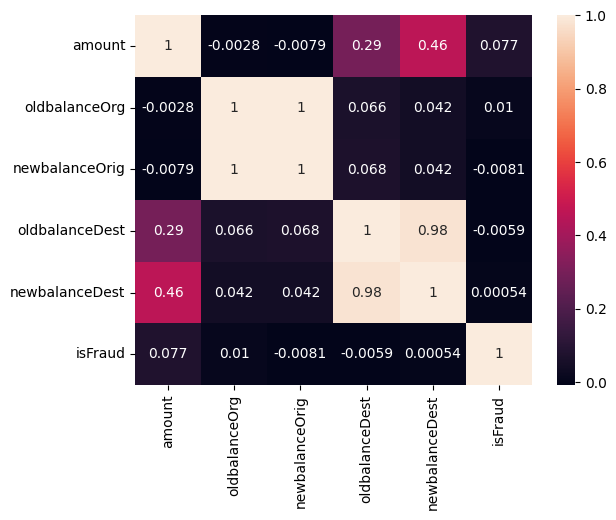

In [24]:
sns.heatmap(df[col_num].corr(), annot =True)

### Additional Data Preparation before Modeling

In [25]:
## Featuring Engineering

In [26]:
df["balance_change_orig"] = df["newbalanceOrig"] - df["oldbalanceOrg"]
df["balance_chage_dest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [27]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balance_change_orig,balance_chage_dest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,-9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,-1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,-181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,-181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,-11668.14,0.0


In [28]:
## One Hot Encoding

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   type                 object 
 1   amount               float64
 2   oldbalanceOrg        float64
 3   newbalanceOrig       float64
 4   oldbalanceDest       float64
 5   newbalanceDest       float64
 6   isFraud              int64  
 7   balance_change_orig  float64
 8   balance_chage_dest   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 436.9+ MB


In [30]:
df = pd.get_dummies(df)
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balance_change_orig,balance_chage_dest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,-9839.64,0.0,False,False,False,True,False
1,1864.28,21249.0,19384.72,0.0,0.0,0,-1864.28,0.0,False,False,False,True,False
2,181.00,181.0,0.00,0.0,0.0,1,-181.00,0.0,False,False,False,False,True
3,181.00,181.0,0.00,21182.0,0.0,1,-181.00,-21182.0,False,True,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,-11668.14,0.0,False,False,False,True,False


In [31]:
## Train Test Split

In [32]:
X = df.drop(columns = ["isFraud"])
y = df["isFraud"]

In [33]:
y = y.fillna(y.mean())

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1 )

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4453834, 12)
(1908786, 12)
(4453834,)
(1908786,)


### Modeling

In [37]:
## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
## Hyperparameter Tuning

In [42]:
params = {
    "max_depth" : [5,10,15],
    "min_samples_leaf" : [100,200,500],
    "n_estimators": [50, 100, 200]
}

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),
                           param_distributions = params,
                           n_iter=5,
                           cv = 3,
                           scoring = "roc_auc",
                           n_jobs=-1
                          )

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [100, 200, 500],
                                        'n_estimators': [50, 100, 200]},
                   scoring='roc_auc')

In [45]:
rf_best = random_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=500, n_estimators=50)

### Evaluation

In [46]:
from sklearn.metrics import recall_score

y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_rf_best = rf_best.predict(X_test)

In [47]:
print(recall_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf_best, pos_label = 1, average = "binary"))

0.8715559157212318
0.8107779578606159
0.6482982171799028


In [48]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf_best, pos_label = 1, average = "binary"))

0.8903145695364238
0.9578745811393011
0.963275135460566


In [49]:
from sklearn.metrics import roc_auc_score

y_prob_dtree = dtree.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_rf_best = rf_best.predict_proba(X_test)[:,1]

In [50]:
print(roc_auc_score(y_test, y_prob_dtree))
print(roc_auc_score(y_test, y_prob_rf))
print(roc_auc_score(y_test, y_prob_rf_best))

0.9357084521433117
0.9944282439247317
0.9987439605268367


### Kesimpulan Bisnis

#### Dampak Bisnis

In [52]:
# Final model = Decision Tree
# Recall = 87%, Precision = 88%

# Asumsikan untuk setiap 100 transaksi, 5 di antaranya adalah penipuan.

# Sebelum model:
      # kita tidak tahu transaksi mana yang akan menjadi penipuan, sehingga tidak ada mitigasi terhadap penipuan.
      # Fraud cases = 5
      # Loss = 5 * 1 M = 5M

# Setelah model :
      # Kita mengetahui transaksi mana yang lebih mungkin menjadi penipuan.
      # Fraud cases = 5 - 5*Recall = 5 - 5*0.87 = 0.65 ~ 1 M
      # Loss = 1* 1M = 1M bahasa indonesia